In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

1. Loading and Preprocessing

In [9]:
df = pd.read_csv(r"C:\Users\pssha\OneDrive\Desktop\CarPrice_Assignment.csv")





In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [17]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [19]:
# Drop car_ID and CarName for now (CarName has mixed format)
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [21]:
# Handle categorical variables with one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [23]:
# Split dataset into features and target
X = df.drop('price', axis=1)
y = df['price']

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Steps Taken:
Dataset Loaded using pandas from the provided CSV file.

Exploratory Data Analysis (EDA) was performed to check for:

Missing values

Irrelevant columns

Inconsistent formatting

Data Cleaning:

Columns like CarName were split to extract the brand name (used as a categorical variable).

Fixed spelling mistakes in brand names (e.g., maxda → mazda, vw → volkswagen).

Encoding Categorical Variables:

Used One-Hot Encoding for variables like carbody, fueltype, drivewheel, etc.

Feature Scaling:

Applied StandardScaler for algorithms that are sensitive to feature scale (especially SVR and Linear Regression).

Data Splitting:

Split into training (80%) and testing (20%) sets using train_test_split.

2. Model Implementation

In [27]:
# Standardize features (important for SVR and Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1.Linear Regression

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

print("🔹 Linear Regression:")
print(f"R2 Score: {lr_r2:.4f}")
print(f"MSE: {lr_mse:.2f}")
print(f"MAE: {lr_mae:.2f}")

🔹 Linear Regression:
R2 Score: 0.8926
MSE: 8482008.48
MAE: 2089.38


2.Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation
dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)

print("\n Decision Tree Regressor:")
print(f"R2 Score: {dt_r2:.4f}")
print(f"MSE: {dt_mse:.2f}")
print(f"MAE: {dt_mae:.2f}")


 Decision Tree Regressor:
R2 Score: 0.8949
MSE: 8300272.36
MAE: 1886.32


 Decision Tree Regressor:
R2 Score: 0.8949
MSE: 8300272.36
MAE: 1886.32

3.Random Forest Regressor

In [33]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print("\n Random Forest Regressor:")
print(f"R2 Score: {rf_r2:.4f}")
print(f"MSE: {rf_mse:.2f}")
print(f"MAE: {rf_mae:.2f}")


 Random Forest Regressor:
R2 Score: 0.9580
MSE: 3314701.74
MAE: 1261.42


4.Gradient Boosting Regressor

In [35]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)

print("\n Gradient Boosting Regressor:")
print(f"R2 Score: {gb_r2:.4f}")
print(f"MSE: {gb_mse:.2f}")
print(f"MAE: {gb_mae:.2f}")


 Gradient Boosting Regressor:
R2 Score: 0.9251
MSE: 5912585.34
MAE: 1683.95


5.Support Vector Regressor (SVR)

In [37]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation
svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_mae = mean_absolute_error(y_test, y_pred_svr)

print("\n Support Vector Regressor:")
print(f"R2 Score: {svr_r2:.4f}")
print(f"MSE: {svr_mse:.2f}")
print(f"MAE: {svr_mae:.2f}")


 Support Vector Regressor:
R2 Score: -0.0999
MSE: 86829819.98
MAE: 5697.66


Implemented Models:
Linear Regression:-
Assumes a linear relationship between features and target.

Good baseline model, easy to interpret.

Decision Tree Regressor:-
Non-linear model that splits data into smaller segments.

Prone to overfitting on small datasets.

Random Forest Regressor:-
Ensemble of multiple decision trees.

Reduces overfitting, improves accuracy and generalization.

Gradient Boosting Regressor:-
Builds models sequentially by correcting errors from the previous model.

Slower but usually more accurate than Random Forest.

Support Vector Regressor (SVR):-
Uses hyperplanes to predict values.

Requires scaling and is computationally intensive.

In [ ]:
3. Model Evaluation

In [39]:
# Summary of results
results = {
    "Linear Regression": [lr_r2, lr_mse, lr_mae],
    "Decision Tree": [dt_r2, dt_mse, dt_mae],
    "Random Forest": [rf_r2, rf_mse, rf_mae],
    "Gradient Boosting": [gb_r2, gb_mse, gb_mae],
    "SVR": [svr_r2, svr_mse, svr_mae]
}

# Create DataFrame
results_df = pd.DataFrame(results, index=['R2 Score', 'MSE', 'MAE']).T.sort_values(by='R2 Score', ascending=False)
print("📈 Model Performance Comparison:\n")
print(results_df)

📈 Model Performance Comparison:

                   R2 Score           MSE          MAE
Random Forest      0.958012  3.314702e+06  1261.417451
Gradient Boosting  0.925104  5.912585e+06  1683.951892
Decision Tree      0.894859  8.300272e+06  1886.321146
Linear Regression  0.892557  8.482008e+06  2089.382729
SVR               -0.099891  8.682982e+07  5697.657697


4. Feature Importance Analysis

In [41]:
# Fit model again if needed
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort and display top 10 features
top_features = importances.sort_values(ascending=False).head(10)
print("Top 10 Significant Features:\n")
print(top_features)

Top 10 Significant Features:

enginesize    0.544441
curbweight    0.299421
highwaympg    0.045694
horsepower    0.035511
carwidth      0.013533
carlength     0.009019
wheelbase     0.007541
peakrpm       0.006795
citympg       0.006493
stroke        0.004913
dtype: float64


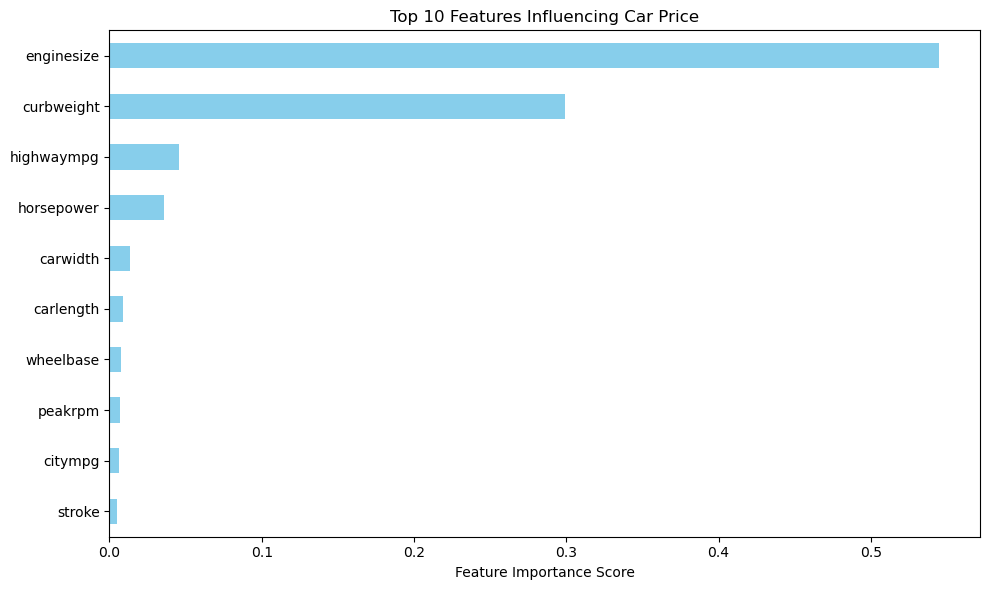

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Features Influencing Car Price")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()

5. Hyperparameter Tuning

In [45]:
# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate base model
rf_base = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit
grid_search.fit(X_train, y_train)

# Best params
print(" Best Hyperparameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
